<a href="https://colab.research.google.com/github/Jaswanth2323/Dev-portfolio/blob/main/cat_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
pip install Sequential

  Preparing metadata (setup.py) ... done
  Created wheel for Sequential: filename=sequential-1.0.0-py3-none-any.whl size=2857 sha256=6c80785526a33144951794421e64cc6bf917672a983050a4fa0279626b917859
  Stored in directory: /root/.cache/pip/wheels/05/ac/b5/068680e1aff2cfe9e3a77e3233bbfb04c612152e6d02089c47
Successfully built Sequential


In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential # This line imports Sequential correctly
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# ... (rest of the code)

model = Sequential() # Use Sequential with a capital 'S' here
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# ... (rest of the code)


In [22]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
histroy = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 127, 127, 32)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 🔹 Add Flatten to convert 2D features to 1D
model.add(Flatten())

# 🔹 Final Dense layer for classification
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' with more than 2 classes

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
print(train_ds.element_spec)  # Check dataset structure


(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [26]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.5910 - loss: 0.7189 - val_accuracy: 0.6942 - val_loss: 0.5629
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.7233 - loss: 0.5453 - val_accuracy: 0.7566 - val_loss: 0.5154
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7949 - loss: 0.4443 - val_accuracy: 0.7574 - val_loss: 0.5288
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8483 - loss: 0.3454 - val_accuracy: 0.7664 - val_loss: 0.5559
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8987 - loss: 0.2476 - val_accuracy: 0.7654 - val_loss: 0.6565
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9363 - loss: 0.1693 - val_accuracy: 0.7568 - val_loss: 0.8048
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9610 - loss: 0.1110 - val_accuracy: 0.7544 - val_loss: 0.9527
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9760 - loss: 0.0742 - 

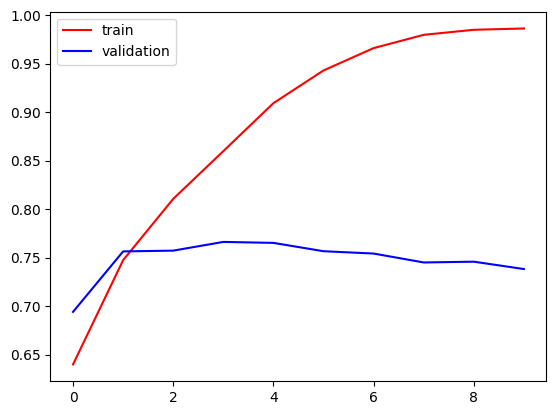

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

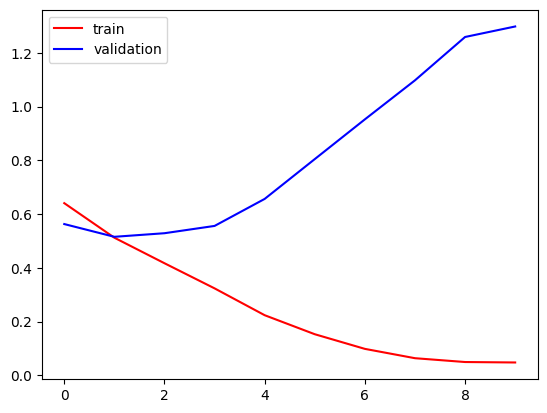

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show( )

In [1]:
import cv2

In [2]:
test_img = cv2.imread('/download.jpg')


In [3]:
plt.imshow(test_img)

NameError: name 'plt' is not defined

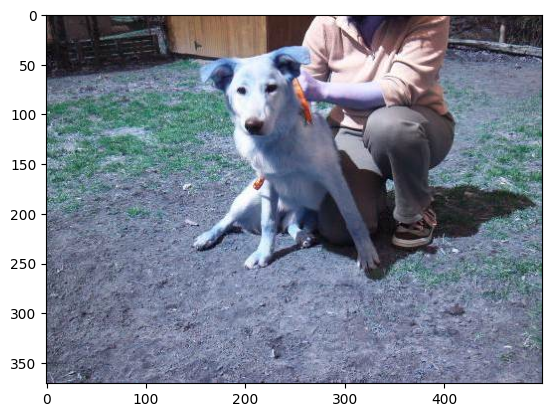

In [27]:
import matplotlib.pyplot as plt
import cv2

test_img = cv2.imread('/dog.22.jpg')

plt.imshow(test_img)
plt.show() # This line might be needed to display the image

In [28]:
test_img.shape

(371, 499, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[[[0.00000000e+00, 1.28738527e+01, 0.00000000e+00, ...,
          0.00000000e+00, 2.33714104e+00, 0.00000000e+00],
         [0.00000000e+00, 6.11668825e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 4.91433382e+00],
         [0.00000000e+00, 1.01293774e+01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 5.44881296e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 1.23589745e+01, 0.00000000e+00, ...,
          0.00000000e+00, 4.50516891e+00, 0.00000000e+00],
         [0.00000000e+00, 4.34303105e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 3.63467932e+00],
        

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Define the model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# ... (rest of model definition)

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

# Now you can use the model for prediction
import cv2

test_img = cv2.imread('/download.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
predictions = model.predict(test_input)

print(predictions) # Print the predictions

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'train_ds' is not defined